# Mapping and Hot-Spotting Oil-Spill Risk
Link to GitHub repository: https://github.com/lyric-greif/gis-final-project

Link to ArcGIS Project Storymap: https://arcg.is/0qbfnC

# Research Group Members:

## Natalie Mesplay (A59025205)

## Lyric Greif (A59024988)

## Vittoria Trupiano (A16621484) 

# Research Question and Significance

This project employs machine learning and spatial statistic techniques on remotely sensed data to examine spatial clustering of oil spills in the Mediterranean Sea. Specifically, we investigate whether oil spills tend to concentrate in particular locations within the Mediterranean Sea, and whether any locations contain statistically significant hotspots. Understanding these spatial patterns is important for identifying high-risk areas within the Mediterranean, which can support the development of oil spill response strategies in vulnerable regions of the sea. 

The primary audience for this analysis is the European Maritime Safety Agency, which is responsible for preventing and responding to incidents of ocean pollution. Additionally, individual shipping agencies, refineries, and regional port authorities can benefit from heightened awareness of oil spill risk areas. 

Using machine learning to identify spatial clusters is a valuable tool for visualizing the concentration of oil spill incidents within a particular region. Additionally, analyzing hotspots in the context of oil spills is important because it reveals statistically significant clusters of pollution concentration, highlighting areas where regulatory compliance can be improved. These insights support the prevention, monitoring, and cleanup of oil spills by delivering insight into regions which require additional monitoring. This knowledge is important for developing actionable policy recommendations that protect marine ecosystems and regulate the transport of petroleum products. 

Our final analysis changed significantly compared to our project proposal. Our original project goal was to determine which spatial and/or temporal clusters of spills portend poor port-reception compliance. The reason for the divergence was the lack of available data on vessel identification (MMSI or AIS), which prevented us from linking oil spill incidents to specific vessels and ports. Due to the limited availability of vessel and port identification data, we pivoted to performing a broader spatial analysis of oil spill distribution and concentration patterns. 


# Background and Literature

Oil spills have devastating effects on fish, marine mammals, birds, and invertebrate species (Vieties et al., 2004). The Mediterranean Sea has a high incidence of oil spills due to heavy maritime traffic and industrial activities on the coast, including large numbers of refineries and petrochemical facilities (European Environmental Agency, 2025). Around 35% of oil entering the Mediterranean Sea originates from shipping activities, while 45% comes from land-based activities (European Environmental Agency, 2025).

Machine learning tools are increasingly being employed to identify and classify oil spills. Due to their devastating impact and diverse chemical properties, effective treatment of oil spills depends not only on timely identification, but also accurate classification (Bui et al., 2024), prediction (Bisen et al., 2024), and mapping. There are two primary methods used for identification of oil spills: direct surveillance using marine vehicles and remote sensing techniques. Several novel approaches build on these techniques to improve identification and classification methods through data augmentation (Bui et al., 2024) and prediction using vessel movement data (Bisen et al., 2024). Analyzing oil spill incident data can also be used to determine a baseline for the improvement of prevention and response activities (Park et al., 2016).

Machine learning can also help identify where oil spills are naturally clustered within a marine region. Insight on spatial concentration of oil spills is complemented by hotspot analysis, which is used to determine the location of statistically significant clusters of environmental hazards. Our analysis takes this route, using a combination of machine learning and spatial statistics to reveal areas of the Mediterranean Sea where oil spills are concentrated. 

The references included in this section helped us situate our project in the context of existing research using machine learning and spatial statistical analysis. With these sources in mind, we were better able to understand possible directions for our analysis and decided to focus on determining whether oil spills concentrate randomly or display statistically significant patterns. 

References: 
1. Durango-Cordero, Juan, Mehdi Saqalli, Christophe Laplanche, Marine Locquet, and Arnaud Elger. 2018. “Spatial Analysis of Accidental Oil Spills Using Heterogeneous Data: A Case Study from the North-Eastern Ecuadorian Amazon.” Sustainability 10 (12): 4719. https://doi.org/10.3390/su10124719.
2. Park, Yong, Hamad Al-Qublan, EunSu Lee, and Gokhan Egilmez. 2016. “Interactive Spatiotemporal Analysis of Oil Spills Using Comap in North Dakota.” Informatics 3 (2): 4. https://doi.org/10.3390/informatics3020004.
3. Bayramov, Emil, Kada ,Martin, and Manfred and Buchroithner. 2018. “Monitoring Oil Spill Hotspots, Contamination Probability Modelling and Assessment of Coastal Impacts in the Caspian Sea Using SENTINEL-1, LANDSAT-8, RADARSAT, ENVISAT and ERS Satellite Sensors.” Journal of Operational Oceanography 11 (1): 27–43. https://doi.org/10.1080/1755876X.2018.1438343.
4. European Environment Agency. 2025. “Oil Spills in Europe’s Seas.” March 2, 2025. https://www.eea.europa.eu/en/european-zero-pollution-dashboards/indicators/oil-spills-in-europes-seas.


# Python Packages

## --- Core System & Web Utilities ---

`import os` used to interact with the operating system, such as file paths
`import requests` send HTTP requests to fetch data from APIs

In [2]:
import os  
import requests 

## --- Data Handling ---

`import pandas as pd` Used to load, clean, and manage tabular datasets (e.g. vessel, spill, and centroid data)

In [3]:
import pandas as pd  

## --- Geospatial Tools ---

`import geopanda` as gpds used for loading, transforming, and plotting geographic features (e.g., vessel positions, spill areas), `from shapely.geometry import Point` as used to calculate the Spatial Mean point, `import numpy as np` as used to calculate Standard Distance

In [4]:
import geopandas as gpd  
from shapely.geometry import Point
import numpy as np

## --- Visualization ---

`import matplotlib.pyplot as plt` Used extensively to visualize clustering results and hot spot maps, `import contextily as ctx` adds basemaps for geographic context; used in `query_to_gdf_vis` to add OpenStreetMap tiles

In [5]:
import matplotlib.pyplot as plt 
import contextily as ctx  

##  --- ArcGIS Analysis Tools ---

`import arcgis`, as it is the main ArcGIS package enabling spatial analysis and GIS platform access 
`from arcgis.gis import GIS` logs in to ArcGIS Online and manage hosted layers. 
`from arcgis import geometry` is used for geometric operations, such as buffering and spatial queries.
`from arcgis.features import GeoAccessor, GeoSeriesAccessor` converts GeoDataFrames to Spatially Enabled DataFrames and vice versa, which is critical for integration between GeoPandas and ArcGIS.
`from IPython.display import display` displays DataFrames and results clearly in cells.
`from arcgis.features import analysis` is used would be for general geoprocessing (e.g., buffer, merge).
`from arcgis.features import analyze_patterns` are used for Hot Spot Analysis (Gi*) on vessel spill area data.
`from arcgis.features import summarize_data` summarizes spatial statistics over regions

In [6]:
import arcgis  
from arcgis.gis import GIS  
from arcgis import geometry  
from arcgis.features import GeoAccessor, GeoSeriesAccessor 
from IPython.display import display  
from arcgis.features import analysis  
from arcgis.features import analyze_patterns 
from arcgis.features import summarize_data

## --- Machine Learning (for Clustering) ---

`from sklearn.cluster import DBSCAN`  is a density-based clustering algorithm utilized in this project to identify spill clusters
`from sklearn.preprocessing import StandardScaler` scales spatial coordinates for better clustering performance, `from sklearn.neighbors import NearestNeighbors` as used in K-NN calculations

In [7]:
from sklearn.cluster import DBSCAN  # Density-based clustering algorithm (used to identify spill clusters)
from sklearn.preprocessing import StandardScaler  # Scales spatial coordinates for better clustering performance
from sklearn.neighbors import NearestNeighbors

In [8]:
gis = GIS(username = 'gpec447sp25_19')

Enter password:  ········


# Data Sources

The primary data source for this project comes from SkyTruth Cerulean’s API, which detects both acute and chronic oil pollution from vessels and offshore oil platforms. SkyTruth Cerulean derives oil slick data from the Sentinel-1 satellite mission of the European Space Agency. Sentinel scenes are filtered to exclude land, then Skytruth applies its machine learning algorithm to determine which pixels contain oil. The model accomplishes this by pulling satellite images from the server, segmenting pixels to identify those containing oil, and creating a vector outline to represent the oil slick footprint. Finally, an algorithm is used to link oil slicks to a source: either broadcasting vessels, oil infrastructure, or dark vessels. 

Our data selection originally included the Maritime Mobile Service Identity (MMSI) number, which we planned to use to link spills to vessels and/or ports. However, the MMSI is unavailable through the Cerulean API. Therefore, we only used data made available through the API, which included oil slick geometry, slick ID, the timestamp of the oil slick, and the cause of the slick. Without vessel identification, we were unable to link spills with vessels, and subsequently to the ports to which the vessels travel. Future analysis would benefit from data on the origin and destinations of vessels involved with oil spills in order to better understand where vessels with poor environmental compliance call. 

Link to project GitHub repository: 

# Data Cleaning & Data Pulling

The data cleaning process for this project consists of querying the Cerulean API to retrieve oil slick data in the western and eastern portions of the Mediterranean Sea. Query results were filtered to include oil slick detections with a machine confidence level over 90% (meaning the spill detection algorithm is 90% sure the detection is an actual spill), with dates filtered between Jan. 1st, 2020 and Jan. 1st, 2025. The raw data was converted to a GeoDataFrame and reprojected to EPSG: 3035 (the projected CRS for Europe).

The western and eastern segments of the Mediterranean Sea were joined and centroids were calculated for each oil slick geometry, then reprojected back into latitude and longitude. Finally, the coordinates of each point were extracted. These steps allowed for the visualization of oil slick geometries, and for clustering using DBSCAN. 

In [9]:
def query_to_gdf_vis(data):
    gdf = gpd.GeoDataFrame.from_features(data["features"])
    gdf.crs = "EPSG:4326"
    gdf = gdf.to_crs(epsg=3857)
    ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
    ctx.add_basemap(
        ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs.to_string()
    )
    plt.show()
    return gdf

def query_to_gdf_vis_col(data):
    gdf = gpd.GeoDataFrame.from_features(data["features"])
    gdf.crs = "EPSG:4326"
    gdf = gdf.to_crs(epsg=3857)
    ax = gdf.plot(
        figsize=(10, 10),
        alpha=0.6,
        edgecolor="k",
        column='cluster',       # color by cluster
        cmap='tab10',           # categorical color map
        legend=True
    )
    plt.show()
    return gdf

In [10]:
example_aoi_name = (
    "https://api.cerulean.skytruth.org/collections/public.aoi/items"  # This is the endpoint for all AOI data
    "?filter=LOWER(name) LIKE '%medit%'"  # filter by name (helps to search for what aois we can look at)
)

data = requests.get(example_aoi_name).json()
print("Number of results:", len(data["features"]))
print(data["features"][1]["properties"])

aoi_id = data["features"][0]["properties"]["id"]
aoi_id2 = data["features"][1]["properties"]["id"]

Number of results: 5
{'id': 363, 'type': 2, 'name': 'Mediterranean Sea - Western Basin'}


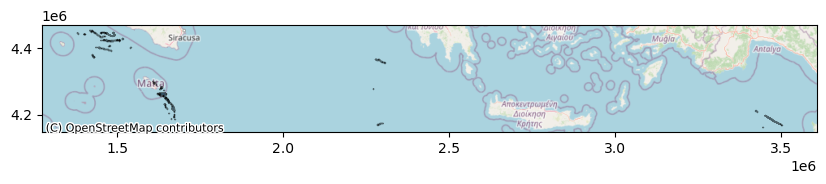

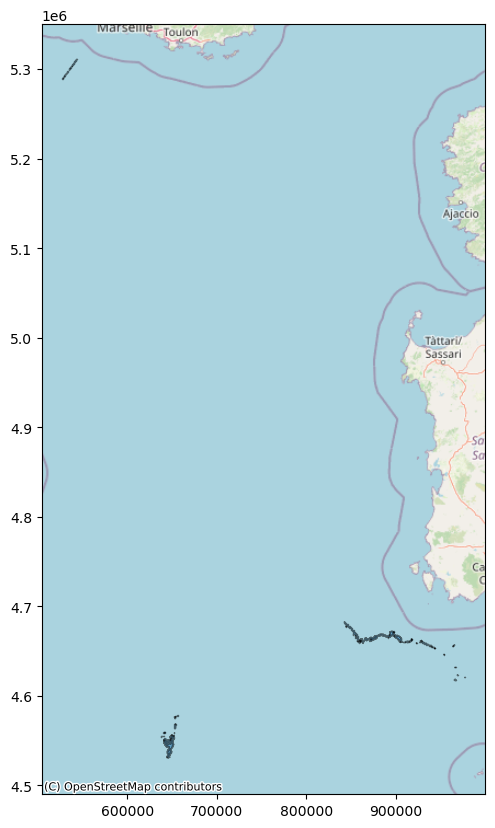

In [11]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2020-01-01T00:00:00Z/2021-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2020 to jan 01 2021)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf1 = get_slicks_by_aoi(aoi_id)
gdf2 = get_slicks_by_aoi(aoi_id2)

### Screenshot of above map



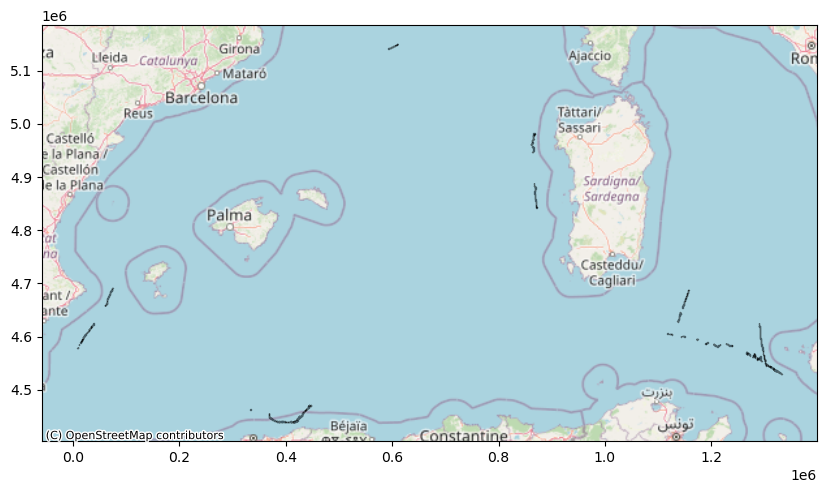

In [12]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2021-01-01T00:00:00Z/2022-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2021 to jan 01 2022)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf3 = get_slicks_by_aoi(aoi_id)
gdf4 = get_slicks_by_aoi(aoi_id2)


### Screenshot of above map



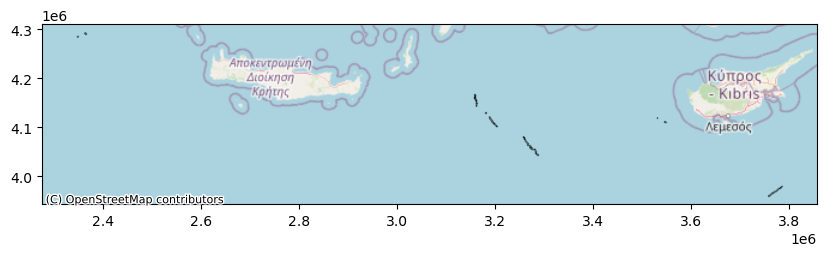

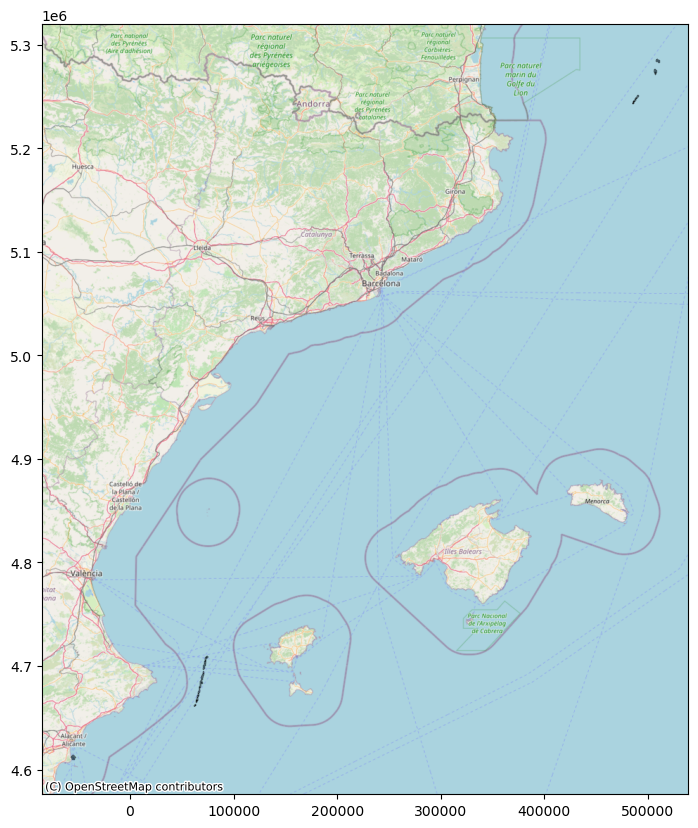

In [13]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2022-01-01T00:00:00Z/2023-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2022 to jan 01 2023)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf5 = get_slicks_by_aoi(aoi_id)
gdf6 = get_slicks_by_aoi(aoi_id2)

### Screenshot of above map

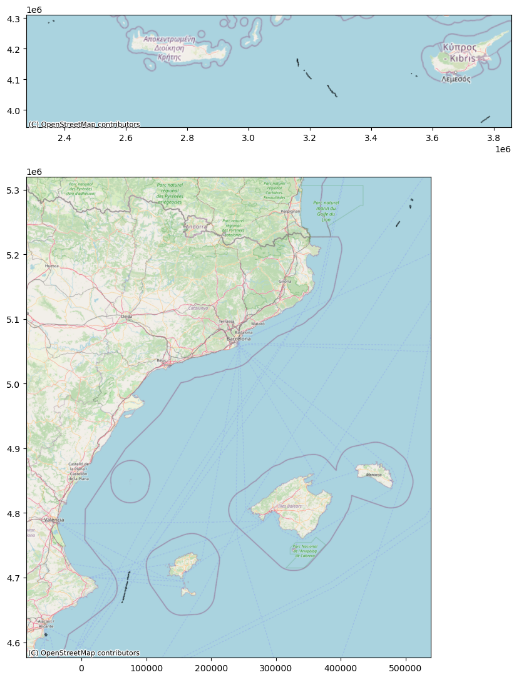

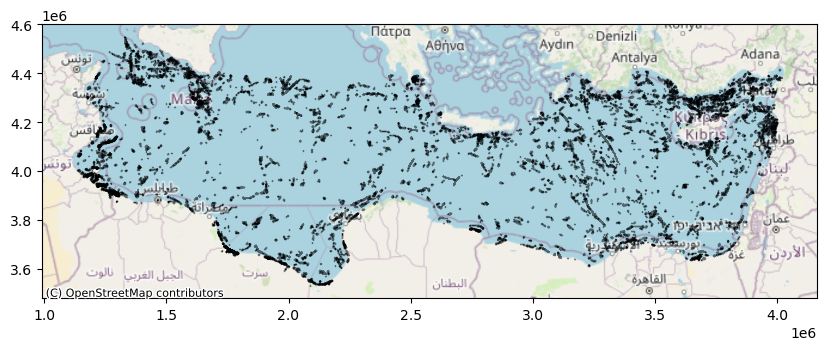

In [14]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2023-01-01T00:00:00Z/2024-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2023 to jan 01 2024)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf7 = get_slicks_by_aoi(aoi_id)
gdf8 = get_slicks_by_aoi(aoi_id2)

### Screenshot of above map

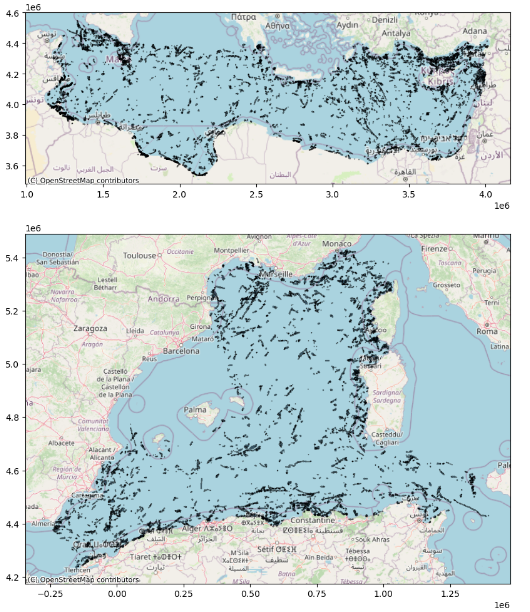

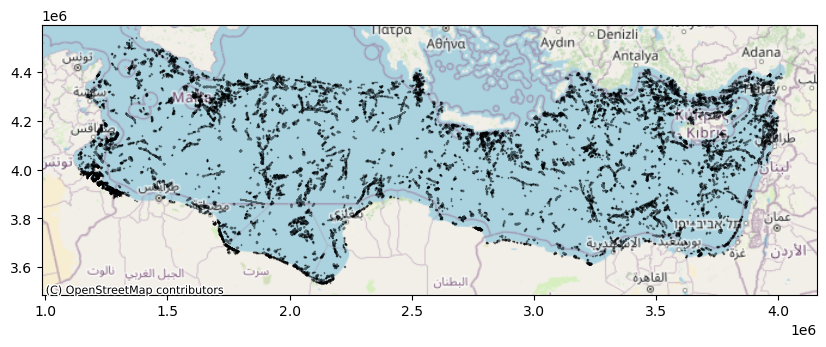

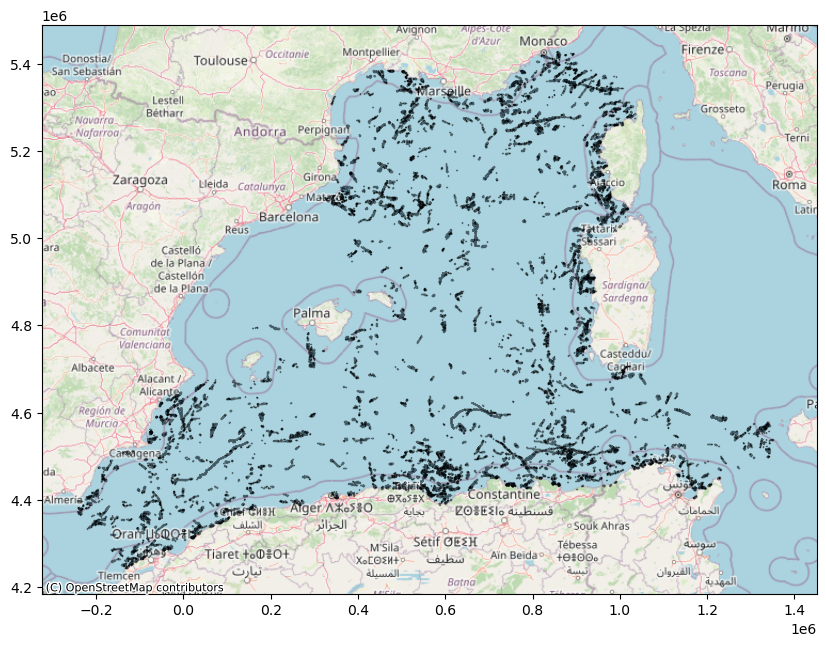

In [15]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2024-01-01T00:00:00Z/2025-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2024 to jan 01 2025)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf9 = get_slicks_by_aoi(aoi_id)
gdf10 = get_slicks_by_aoi(aoi_id2)

### Screenshot of above map

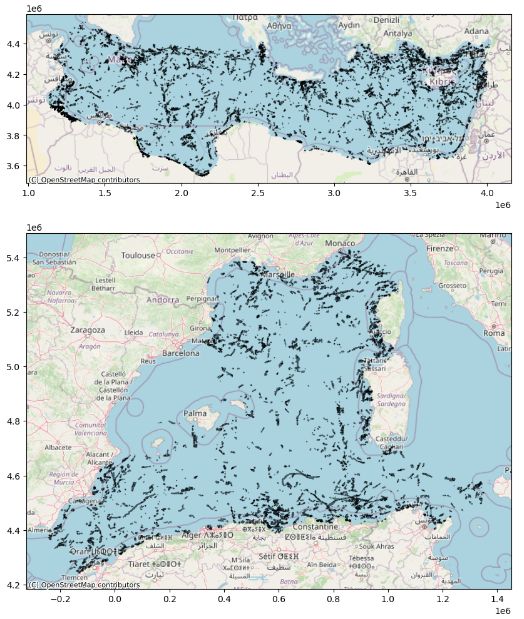

In [16]:
# combine east and west mediterranean data pulls by year
gdf_combined20 = gpd.GeoDataFrame(pd.concat([gdf1, gdf2], ignore_index=True))
gdf_combined21 = gpd.GeoDataFrame(pd.concat([gdf3, gdf4], ignore_index=True))
gdf_combined22 = gpd.GeoDataFrame(pd.concat([gdf5, gdf6], ignore_index=True))
gdf_combined23 = gpd.GeoDataFrame(pd.concat([gdf7, gdf8], ignore_index=True))
gdf_combined24 = gpd.GeoDataFrame(pd.concat([gdf9, gdf10], ignore_index=True))

In [17]:
# combine all full mediterranean year pulls into a full 5 year mediterranean dataframe
gdf_final = gpd.GeoDataFrame(pd.concat(
    [gdf_combined20, gdf_combined21, gdf_combined22, gdf_combined23, gdf_combined24],
    ignore_index=True
))

In [18]:
gdf_final.head()

geometry       id    linearity  \
0  MULTIPOLYGON (((3500892.343 4169066.378, 35009...  3581643  5246.365454   
1  MULTIPOLYGON (((1493503.143 4438134.886, 14936...  3581752  7657.234902   
2  MULTIPOLYGON (((1520555.671 4430952.015, 15211...  3474854   173.425835   
3  MULTIPOLYGON (((2299757.821 4175786.302, 22998...  3581962  1263.164600   
4  MULTIPOLYGON (((3419480.837 4214991.727, 34195...  3581651   322.435373   

       slick_timestamp  active  orchestrator_run                 create_time  \
0  2020-11-06T15:58:08    True            179195  2024-12-03T18:52:49.611954   
1  2020-10-23T05:13:29    True            179204  2024-12-03T18:53:18.593556   
2  2020-09-23T17:04:39    True            151729  2024-09-20T12:16:56.657091   
3  2020-10-27T04:40:47    True            179207  2024-12-03T18:54:32.020087   
4  2020-11-06T15:58:08    True            179195  2024-12-03T18:52:49.611954   

   inference_idx  cls hitl_cls  ...  fill_factor  \
0              3    5     None  ...     0.244946   
1              3    5     None  ...     0.049705   
2              3    5     None  ...     0.226733   
3              3    5     None  ...     0.165850   
4              3    5     None  ...     0.416663   

                                         s1_scene_id  cls_short_name  \
0  S1A_IW_GRDH_1SDV_20201106T155808_20201106T1558...          VESSEL   
1  S1A_IW_GRDH_1SDV_20201023T051329_20201023T0513...          VESSEL   
2  S1A_IW_GRDH_1SDV_20200923T170439_20200923T1705...          VESSEL   
3  S1A_IW_GRDH_1SDV_20201027T044047_20201027T0441...          VESSEL   
4  S1A_IW_GRDH_1SDV_20201106T155808_20201106T1558...          VESSEL   

   cls_long_name  aoi_type_1_ids  aoi_type_2_ids aoi_type_3_ids  \
0         Vessel           [159]           [326]           None   
1         Vessel           [224]           [326]           None   
2         Vessel           [224]           [326]           None   
3         Vessel           [175]           [326]           None   
4         Vessel           [176]           [326]           None   

                                   source_type_1_ids source_type_2_ids  \
0                             [667001716, 368065790]              None   
1  [355770000, 215330000, 371831000, 374824000, 2...              None   
2                                               None              None   
3       [511234000, 564361000, 215334000, 636018485]              None   
4                                        [667001716]              None   

                                   source_type_3_ids  
0  [D78.61121, D132.58676, D93.95600999999999, D1...  
1                           [D62.785477, D199.73715]  
2                                               None  
3                                               None  
4  [D147.52322, D93.95600999999999, D132.58676, D...  

[5 rows x 25 columns]

In [19]:
# create a centroid dataset for each spill
gdf_projected = gdf_final.to_crs(epsg=32633)
gdf_centroids = gdf_projected.copy()
gdf_centroids['geometry'] = gdf_projected['geometry'].centroid

In [20]:
#gdf_centroids = gdf_centroids.to_crs(gdf_final.crs)

# create coord columns for each centroid
gdf_centroids['longitude'] = gdf_centroids.geometry.x
gdf_centroids['latitude'] = gdf_centroids.geometry.y

teamoilspillcentroids_csv = gdf_centroids.drop(columns='geometry')

# download csv (Commented out to prevent grader downloading it unneccesarily)
# teamoilspillcentroids_csv.to_csv('teamoilspillcentroids.csv', index=False)

In [ ]:
# same as above, commented out on purpose
#gdf_final.to_csv("teamoilspill.csv", index=False)

# Descriptive Statistics for Data

Local spatial autocorrelation is detected by our hotspot analysis, so was not performed separately as a descriptive statistics. Similarly random point patterns were not analyzed as our project centers around the potential non-random patterns present in spills in the Mediterranean. 
Summary statistics were generated for the oil spill centroid dataset, showing the total number of points as 7161, the spatial mean of the dataset at (17.498106, 35.951041), and a standard distance of 5.037642. A map was additionally generated to visualize these summary statistics below.

## Spatial Mean and Standard Distance

To complement these clustering and hot spot techniques, we also calculated two spatial statistics: the spatial mean (a point representing the average location of all spill events) and standard distance (analogous to standard deviation, but in two-dimensional space). The spatial mean provided a central tendency for spill locations, while the standard distance visualized the overall geographic spread. These were plotted alongside our DBSCAN clusters and hot spot bins on basemaps from _OpenStreetMap_, which added interpretability by showing marine geography and nearby coastlines.

Text(0.5, 1.0, 'Oil Spills: Spatial Mean and Standard Distance')

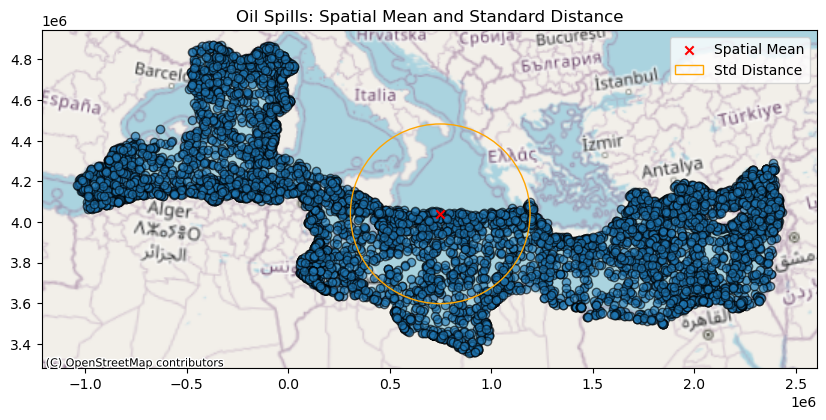

In [21]:
mean_x = gdf_centroids.geometry.x.mean()
mean_y = gdf_centroids.geometry.y.mean()
spatial_mean = Point(mean_x, mean_y)

# Standard distance (similar to std dev but in space)
dists = np.sqrt((gdf_centroids.geometry.x - mean_x)**2 + (gdf_centroids.geometry.y - mean_y)**2)
standard_distance = dists.std()

fig, ax = plt.subplots(figsize=(10, 10))
gdf_centroids.plot(ax=ax, alpha=0.6, edgecolor='k')
gpd.GeoSeries([spatial_mean]).plot(ax=ax, color='red', marker='x', label='Spatial Mean')
circle = plt.Circle((mean_x, mean_y), standard_distance, color='orange', fill=False, label='Std Distance')
ax.add_patch(circle)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_centroids.crs)
ax.legend()
ax.set_title('Oil Spills: Spatial Mean and Standard Distance')

### Screenshot of above map

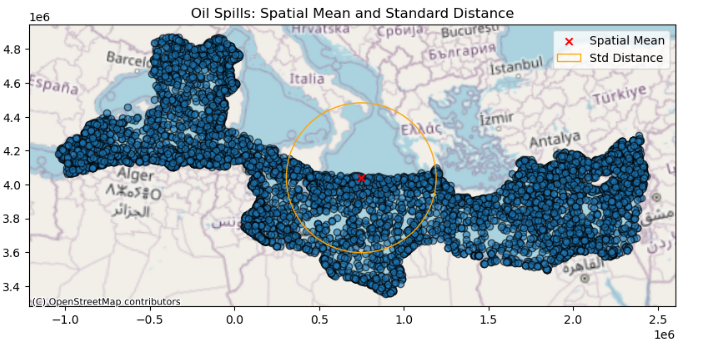

In [22]:
print("Number of points:", len(gdf_centroids))
print("Spatial Mean:", spatial_mean)
print("Standard Distance:", standard_distance)

Number of points: 7161
Spatial Mean: POINT (748442.1976415464 4040027.8743609446)
Standard Distance: 442208.581033345


# Analysis

## Clustering

To investigate patterns in oil spill occurrences throughout the Mediterranean, we conducted both clustering and spatial statistical analyses on point data representing spill centroids. Our core analytical approach began with Density-Based Spatial Clustering of Applications with Noise (DBSCAN), a non-parametric clustering algorithm ideal for identifying spatial clusters of arbitrary shape and size. DBSCAN was chosen over other clustering techniques because of its effectiveness in handling large datasets with noise — a critical factor given the volume and variability of the spill data. Furthermore, while HDBSCAN could have been considered for its hierarchical capabilities, we prioritized DBSCAN for the greater manual control it provides in tuning minimum sample sizes and spatial radii, which allowed us to explore the clustering behavior at different density thresholds.


In [23]:
#extract coordinates
coords = gdf_centroids[['longitude', 'latitude']].values


In [24]:
# standardize coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [25]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [26]:
# apply dbscan
db = DBSCAN(eps=0.08, min_samples=15)  # this looks the best
labels = db.fit_predict(coords_scaled)

In [27]:
# add cluster labels back to GeoDataFrame
gdf_centroids['cluster'] = labels

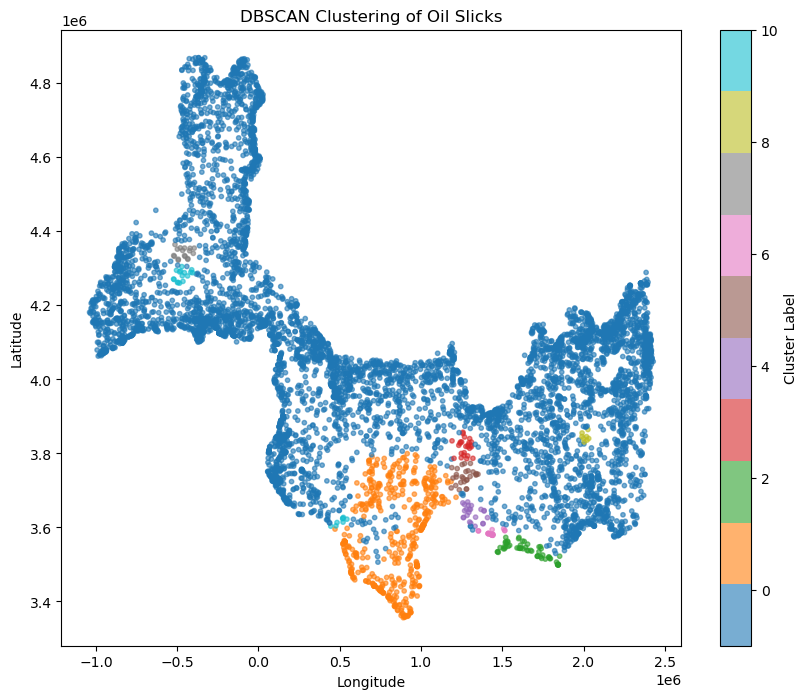

In [28]:
# plot the clusters
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    gdf_centroids['longitude'],
    gdf_centroids['latitude'],
    c=gdf_centroids['cluster'],
    cmap='tab10',
    s=10,
    alpha=0.6
)
plt.title('DBSCAN Clustering of Oil Slicks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

### Screenshot of above map



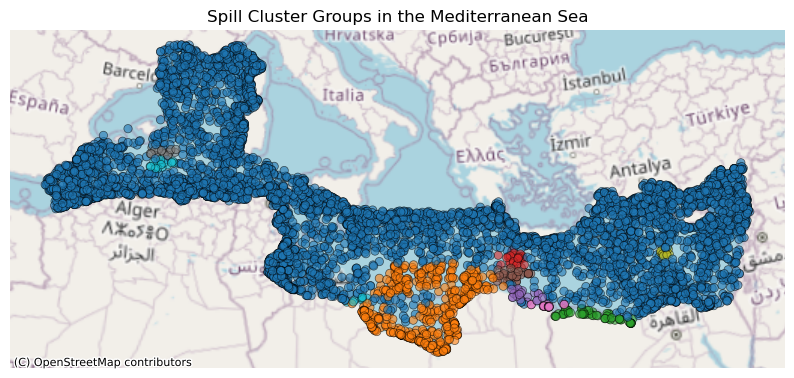

In [29]:
ax = gdf_centroids.plot(
        column='cluster',
        cmap='tab10',
        figsize=(10, 10),
        edgecolor='black',
        linewidth=0.5,
        alpha=0.6
    )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_centroids.crs)
ax.set_title("Spill Cluster Groups in the Mediterranean Sea")
ax.set_axis_off()
plt.show()

### Screenshot of above map



## k-NN Graph

To select the optimal spatial radius parameter (epsilon), we generated a k-nearest neighbors (k-NN) distance graph, with _k=10_. This graph plots the distances to each point’s 10th nearest neighbor in ascending order. The resulting curve revealed a distinct elbow at approximately 0.08, which in our projected coordinate reference system (EPSG:3035) translates to roughly 8 kilometers. The elbow marks the point where the marginal gain in neighbor inclusion plateaus, suggesting it as a natural threshold for the radius of influence around each spill. Based on this, we defined epsilon = 0.08 and set the minimum sample size to 15, which means that for any oil spill to be considered part of a cluster, it must have at least 14 other nearby spills within an 8 km radius. These parameters yielded a robust and interpretable clustering pattern, revealing three distinct spatial groupings across the Mediterranean region.

In [30]:
# 10 nearest neighbors 
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(coords_scaled)
distances, _ = neighbors_fit.kneighbors(coords_scaled)

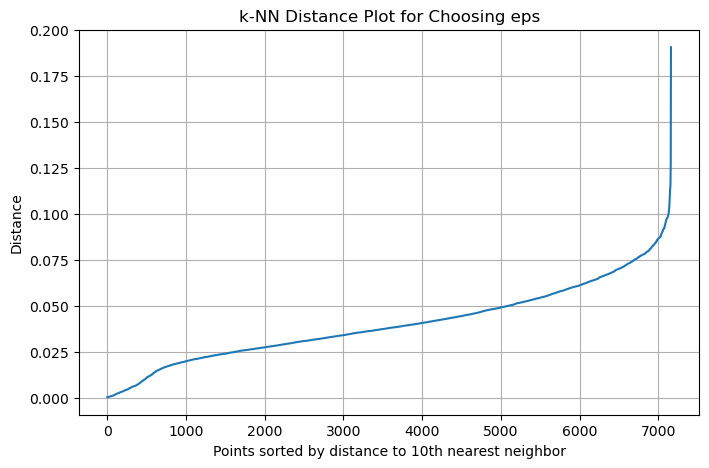

In [31]:
# Sort distances to visualize the elbow
distances = np.sort(distances[:, -1])  # Use the 10th nearest neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-NN Distance Plot for Choosing eps')
plt.xlabel('Points sorted by distance to 10th nearest neighbor')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

### Screenshot of above figure

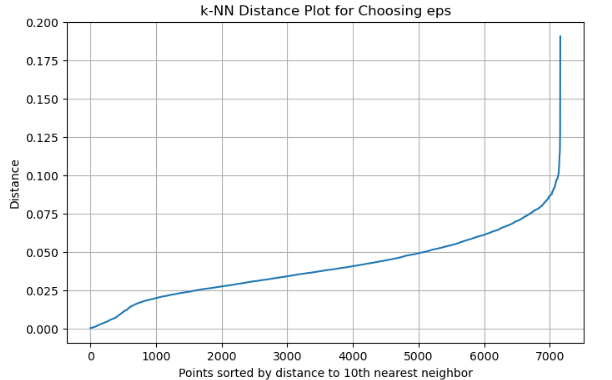

## Hot Spot Analysis

Beyond DBSCAN, we conducted a Hot Spot Analysis using the `find_hot_spots` function from the ArcGIS `analyze_patterns` module. This tool implements the Getis-Ord Gi* statistic to identify statistically significant spatial clusters of high (hot spots) and low (cold spots) values, using the density of spill points across a hexagonal grid overlay. Each hexagon's significance is measured via z-scores and p-values, which test the null hypothesis that the observed pattern could be due to random spatial distribution. Hex bins shaded in dark red represent hot spots with high spill density and strong statistical confidence (p < 0.01), suggesting consistent or anomalous activity in those areas. In contrast, dark blue bins identify cold spots with unusually low spill density. This method enriched our understanding of spatial intensity by layering statistical significance over raw point density, highlighting where policy or monitoring efforts may be especially critical.

In [32]:
gdf_centroids.head()

geometry       id    linearity      slick_timestamp  \
0  POINT (1981351.242 4012078.005)  3581643  5246.365454  2020-11-06T15:58:08   
1   POINT (350316.547 4098177.613)  3581752  7657.234902  2020-10-23T05:13:29   
2   POINT (376281.295 4087853.118)  3474854   173.425835  2020-09-23T17:04:39   
3  POINT (1009354.977 3895220.506)  3581962  1263.164600  2020-10-27T04:40:47   
4  POINT (1937536.196 4027870.939)  3581651   322.435373  2020-11-06T15:58:08   

   active  orchestrator_run                 create_time  inference_idx  cls  \
0    True            179195  2024-12-03T18:52:49.611954              3    5   
1    True            179204  2024-12-03T18:53:18.593556              3    5   
2    True            151729  2024-09-20T12:16:56.657091              3    5   
3    True            179207  2024-12-03T18:54:32.020087              3    5   
4    True            179195  2024-12-03T18:52:49.611954              3    5   

  hitl_cls  ...  cls_long_name  aoi_type_1_ids  aoi_type_2_ids  \
0     None  ...         Vessel           [159]           [326]   
1     None  ...         Vessel           [224]           [326]   
2     None  ...         Vessel           [224]           [326]   
3     None  ...         Vessel           [175]           [326]   
4     None  ...         Vessel           [176]           [326]   

   aoi_type_3_ids                                  source_type_1_ids  \
0            None                             [667001716, 368065790]   
1            None  [355770000, 215330000, 371831000, 374824000, 2...   
2            None                                               None   
3            None       [511234000, 564361000, 215334000, 636018485]   
4            None                                        [667001716]   

   source_type_2_ids                                  source_type_3_ids  \
0               None  [D78.61121, D132.58676, D93.95600999999999, D1...   
1               None                           [D62.785477, D199.73715]   
2               None                                               None   
3               None                                               None   
4               None  [D147.52322, D93.95600999999999, D132.58676, D...   

      longitude      latitude cluster  
0  1.981351e+06  4.012078e+06       0  
1  3.503165e+05  4.098178e+06       0  
2  3.762813e+05  4.087853e+06       0  
3  1.009355e+06  3.895221e+06      -1  
4  1.937536e+06  4.027871e+06       0  

[5 rows x 28 columns]

In [33]:
def truncate_column_names_safe(gdf, max_length=10):
    '''truncates column names to less than 10, and if they are duplicates than add 1,2,3...etc. in order to upload to AGOL'''
    existing = set()
    new_columns = {}

    for col in gdf.columns:
        if len(col) <= max_length:
            new_col = col
        else:
            base = col[:max_length]
            new_col = base
            i = 1
            while new_col in existing or new_col in new_columns.values():
                suffix = f"_{i}"
                new_col = (base[:max_length - len(suffix)] + suffix)
                i += 1
        new_columns[col] = new_col
        existing.add(new_col)

    return gdf.rename(columns=new_columns)

gdf_short = truncate_column_names_safe(gdf_centroids)



In [34]:
gdf_short.head()

geometry       id    linearity           slick_time  \
0  POINT (1981351.242 4012078.005)  3581643  5246.365454  2020-11-06T15:58:08   
1   POINT (350316.547 4098177.613)  3581752  7657.234902  2020-10-23T05:13:29   
2   POINT (376281.295 4087853.118)  3474854   173.425835  2020-09-23T17:04:39   
3  POINT (1009354.977 3895220.506)  3581962  1263.164600  2020-10-27T04:40:47   
4  POINT (1937536.196 4027870.939)  3581651   322.435373  2020-11-06T15:58:08   

   active  orchestrat                  create_tim  inference_  cls hitl_cls  \
0    True      179195  2024-12-03T18:52:49.611954           3    5     None   
1    True      179204  2024-12-03T18:53:18.593556           3    5     None   
2    True      151729  2024-09-20T12:16:56.657091           3    5     None   
3    True      179207  2024-12-03T18:54:32.020087           3    5     None   
4    True      179195  2024-12-03T18:52:49.611954           3    5     None   

   ...  cls_long_n  aoi_type_1  aoi_type_2  aoi_type_3  \
0  ...      Vessel       [159]       [326]        None   
1  ...      Vessel       [224]       [326]        None   
2  ...      Vessel       [224]       [326]        None   
3  ...      Vessel       [175]       [326]        None   
4  ...      Vessel       [176]       [326]        None   

                                          source_typ  source_t_1  \
0                             [667001716, 368065790]        None   
1  [355770000, 215330000, 371831000, 374824000, 2...        None   
2                                               None        None   
3       [511234000, 564361000, 215334000, 636018485]        None   
4                                        [667001716]        None   

                                          source_t_2     longitude  \
0  [D78.61121, D132.58676, D93.95600999999999, D1...  1.981351e+06   
1                           [D62.785477, D199.73715]  3.503165e+05   
2                                               None  3.762813e+05   
3                                               None  1.009355e+06   
4  [D147.52322, D93.95600999999999, D132.58676, D...  1.937536e+06   

       latitude cluster  
0  4.012078e+06       0  
1  4.098178e+06       0  
2  4.087853e+06       0  
3  3.895221e+06      -1  
4  4.027871e+06       0  

[5 rows x 28 columns]

In [35]:
# convert to SDF
sdf = GeoAccessor.from_geodataframe(gdf_short)

# produce a shapefile to upload to AGOL in order to perform hotspot analysis (commented out on purpose to prevent accidental unnecessary downloading)
# gdf_short.to_file("oil_spill_points.shp") # this produces a few errors on unprocessable lat/long coords - these are ignored

In [36]:
# This cell uploads our hot spot to ArcGIS - don't run any of the commented ou bits again bc the output_name will already exist and give you an error

#spills_fl = gis.content.get('48b841b969da4129be70d0cd9998fdee') # this is our centroid data uploaded as a FeatureLayer to ArcGIS Online


#spill_hot_spots = arcgis.features.analysis.find_hot_spots(spills_fl,
#                                     output_name='oil_spills_hotspots',
#                                     shape_type='hexagon', gis=gis)

spill_hot_spots = gis.content.get('b703defbd8fe432095ebdba924dc0a33') # this is just calling the hotspot layer we made in AGOL with the above code

# The error produced on CRS is ignored - the projected CRS is correct and the same

<Item title:"oil_spills_hotspots" type:Feature Layer Collection owner:gpec447sp25_19>
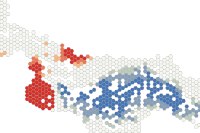

In [37]:
spill_hot_spots

In [38]:
# Add our hotspot shapefile to a map to visualize
m4 = gis.map('Mediterranean Sea')
m4.content.add(spill_hot_spots)
m4.legend.enabled = True
m4

Map(center=[3980817.4992621825, 3312906.630679896], extent={'xmin': 2404984.863769957, 'ymin': 2935544.4185499…

### Screenshot of above map

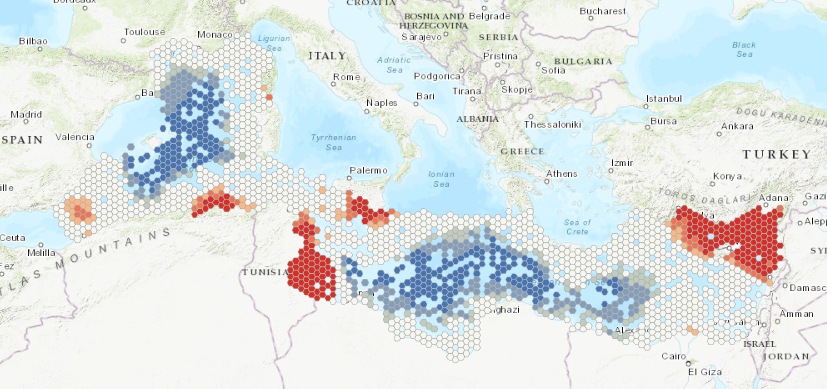

Collectively, these analyses offered a multi-layered view of spill dynamics — from raw clustering to statistical validation and spatial distribution. The combination of unsupervised machine learning, supervisted clustering and hotspot analysis, geostatistics, and visualization helped uncover not only where spills are happening, but also how often, how tightly grouped, and how likely they are to be non-random. This holistic approach lays the groundwork for predictive monitoring or further anomaly detection of vessels responsible for pollution.

# Summary of Results

From this analysis of SkyTruth’s Cerulean data on satellite-detected oil spills, multiple statistically significant hot and cold spots for spills were detected in the Mediterranean Sea. The hotspots are concentrated around coastal areas, while the cold spots are generally found in areas further from shore. This was somewhat counterintuitive, as originally we believed areas further from shore would be more conducive to discreet intentional dumping. The hotspots for spills are in the northeastern Levantine Sea, concentrated north of Cyprus along the coast of Turkey from the port of Antalya, to the ports of Mersin and Iskenderun, and down the western coasts of Syria and Lebanon around the ports of Latakia and Tartus, as well as the port of Tripoli. Other hotspots include the eastern coast of Tunisia, around the ports of Sousse, Sfax, and Gabès. 

The southern and southwestern coast of Sicily is an additional hotspot, around Porto Empodocles, as well as the eastern coast of Algeria around the ports of Béjaïa, Skikda, and Annaba. Cold spots are concentrated further out in the sea between the islands of Sardinia and Mallorca, and in a swath along the coast of Libya and further out into the Mediterranean. The majority of these ports are cargo ports, and further research into this potential correlation is warranted. These findings nevertheless allow coastal states and Regional Fisheries Management Organizations (RFMOs) active in the area, like the General Fisheries Commission for the Mediterranean (GFCM) to better allocate their limited enforcement resources.


# Discussion

These findings dovetail with the earlier literature review, suggesting that a decent portion of oil spills in the Mediterranean stem from industrial activities. It adds on to existing literature by introducing a consideration of major hotspots and examining nearby ports, and specifically by narrowing its focus to a specific geographic region with a history of spills. These results are important, especially to motivate further research on the topic regarding potential correlations between ports and spills in the Mediterranean.

An important tradeoff to mention is the clustering technique, using DBSCAN. First, as opposed to using HDBSCAN, it allowed us to maintain control over the minimum samples, with the consequence of not utilizing the sophistication of the latter method. Regarding the epsilon value, depending on the accuracy or strategy, could create false clusters. Hot spot analysis grid shapes pose an excellent strategy to view clusters within the grids. As opposed to squares, it eliminates the edge effect bias. Hexagons create a more balanced neighbor relationship, but at the cost of a more granular interpretation. 

Also, the data we used was based on Sentinel-1, with a temporal resolution of 6 days. Therefore, strong currents present in the Mediterranean have the potential to alter oil spill data. Some areas are relatively still, and others have more active currents, so our hotspots should be examined more closely in areas known to have stronger currents. Additionally, the data becomes much more robust in 2023, following improvements in satellite resolution, so there may be aymmetrical detection data before and after 2023.

# Conclusion and Future Work

While we were unable to completely answer our initial research question of whether spatial and/or temporal clusters of spills portend poor port-reception compliance due to limitations within our dataset, we successfully explored spatial relationships within oil spill incident data in the Mediterranean Sea using clustering and hotspot techniques. Specifically, we revealed several clusters of oil spill incidents in the Mediterranean using the DBSCAN clustering method; we extended this exploration of oil spill data by conducting hot spot analysis to detect statistically significant clusters. Our approach is highly flexible and can be applied to other marine areas outside of the Mediterranean to determine whether concentrations of oil spills are statistically significant in other regions. Additional data on vessel identification would assist with linking oil spills to specific ports; while this data is available through the Cerulean Online Map it is not currently available via the API. If and when vessel identification data is made available through the API by SkyTruth, further analysis can be performed to link individual oil spills to specific vessels and their ports of call. This would allow for a more robust analysis of port reception non-compliance, as well as strengthened evaluation of monitoring and enforcement activities. 

We expect the results of our analysis to be used by maritime safety, environmental regulatory agencies, and local Coast Guard services in the region. Specific organizations that could make use of our findings are the European Maritime Safety Agency, the European Environment Agency, the  General Fisheries Commission for the Mediterranean, and the coast guards of states with significant oil spill clustering within their exclusive economic zones. 

